# Burgers Equation

Here we solve the Burgers equation $\partial_t u + u \partial_x u=0$ using as an initial condition a gaussian profile $u(x,t=0)=10\exp{[-(x-x_0)^2]}$ with $x_0=5$.

We use a domain $x\in [0,10]$ with periodic boundary conditions.

# Flux conservative form

In [1]:
import numpy as np

# Define the domain
L = 10.0     # Domain length
nx = 201    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the initial condition
x0=5
u_initial = 10*np.exp(-(x-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)
# Define the time step and the final time
cf = 0.5
dt = cf*dx/np.max(u_current)   # Time step
t_final = 0.5

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

nx= 201
dx= 0.05
dt= 0.0025
Number of iterations= 200.0


In [2]:
import matplotlib.pyplot as plt
import os
##create directory where to save images
print(os.getcwd())

#os.makedirs('./upwind_gaussian')

os.listdir('./')

c:\Users\marti\Desktop\University\Numerical relativity


['Another_copy_of_Advection_Equation.ipynb',
 'def_FTCS_gaussian.ipynb',
 'def_LaxFriedrichs_gaussian.ipynb',
 'def_LaxFriedrichs_step.ipynb',
 'def_LaxWendroff_gaussian.ipynb',
 'def_LaxWendroff_gaussian_outflowconditions.ipynb',
 'def_LaxWendroff_step.ipynb',
 'def_Leapfrog_gaussian.ipynb',
 'def_Leapfrog_gaussian_analytic.ipynb',
 'def_Leapfrog_gaussian_outflowconditions.ipynb',
 'def_upwind_gaussian.ipynb',
 'FTCS_gaussian',
 'l2norm_FTCS.dat',
 'l2norm_LAX.dat',
 'l2norm_LAXWENDROFF.dat',
 'l2norm_LEAPFROG.dat',
 'Lax',
 'LaxFriedrichs_gaussian',
 'LaxFriedrichs_step',
 'LaxWendroff_Advection_Equation.ipynb',
 'LaxWendroff_Advection_Equation_conditions.ipynb',
 'LaxWendroff_gaussian',
 'LaxWendroff_gaussian_outflowconditions',
 'LaxWendroff_step',
 'Lax_Advection_Equation.ipynb',
 'Leap',
 'LeapWendroff_Advection_Equation.ipynb',
 'Leap_Advection_Equation.ipynb',
 'Leap_gaussian',
 'Leap_gaussian_analytic',
 'Leap_gaussian_outflowconditions',
 'movie.mp4',
 'movie_FTCS.mp4',
 'mov

In [3]:
# Initilize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.savefig('./upwind_gaussian/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

u_tosave = []
time_tosave = []

#solve the advection equation
while t < t_final:
    # Compute the new solution using the upwind method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = u_current - dt/(2*dx)*(u_current**2 - np.roll(u_current, 1)**2)    
    
    # Update the solution
    u_current = u_next.copy()
    
    #advance the time 
    t += dt
    i += 1

    #update dt
    dt = cf*dx/np.max(u_current)
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    #plot the current result and save in an image at specific times
    if 0.249 < t < 0.251:
        u_tosave.append(u_current)
        time_tosave.append(str(round(t,2)))
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        #plt.ylim(0,1.1)
        plt.savefig('./upwind_gaussian/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()


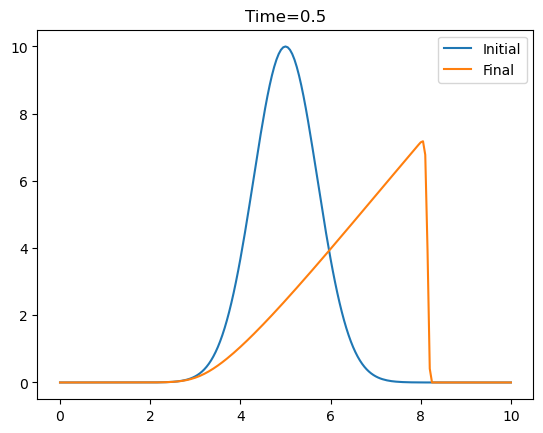

In [4]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
plt.title('Time='+str(round(t,2)))
#plt.ylim(0,1.1)
plt.legend()
plt.show()

In [5]:
# set the directory where your images are stored
directory = "./upwind_gaussian/"

# get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n')

# sort the files in alphanumeric order
files=sorted(files)

print(files)

['fig_00000.png', 'fig_00010.png', 'fig_00020.png', 'fig_00030.png', 'fig_00040.png', 'fig_00042.png', 'fig_00050.png', 'fig_00060.png', 'fig_00070.png', 'fig_00080.png', 'fig_00090.png', 'fig_00093.png', 'fig_00094.png', 'fig_00095.png', 'fig_00096.png', 'fig_00097.png', 'fig_00098.png', 'fig_00099.png', 'fig_00100.png', 'fig_00110.png', 'fig_00120.png', 'fig_00130.png', 'fig_00140.png', 'fig_00150.png', 'fig_00160.png', 'fig_00170.png', 'fig_00245.png', 'fig_00246.png'] 

['fig_00000.png', 'fig_00010.png', 'fig_00020.png', 'fig_00030.png', 'fig_00040.png', 'fig_00042.png', 'fig_00050.png', 'fig_00060.png', 'fig_00070.png', 'fig_00080.png', 'fig_00090.png', 'fig_00093.png', 'fig_00094.png', 'fig_00095.png', 'fig_00096.png', 'fig_00097.png', 'fig_00098.png', 'fig_00099.png', 'fig_00100.png', 'fig_00110.png', 'fig_00120.png', 'fig_00130.png', 'fig_00140.png', 'fig_00150.png', 'fig_00160.png', 'fig_00170.png', 'fig_00245.png', 'fig_00246.png']


In [6]:
%pip install imageio[ffmpeg]
import imageio.v2 as imageio
import glob
images_files = sorted(glob.glob('./upwind_gaussian/fig_*.png'))
output_path = os.path.abspath('./movie_upwind.mp4')

with imageio.get_writer(output_path, fps=20, codec='libx264') as writer:
    for file in images_files:
        image = imageio.imread(file)
        writer.append_data(image)
        


Note: you may need to restart the kernel to use updated packages.


In [7]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook

from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./movie_upwind.mp4" type="video/mp4">
</video></div>""")

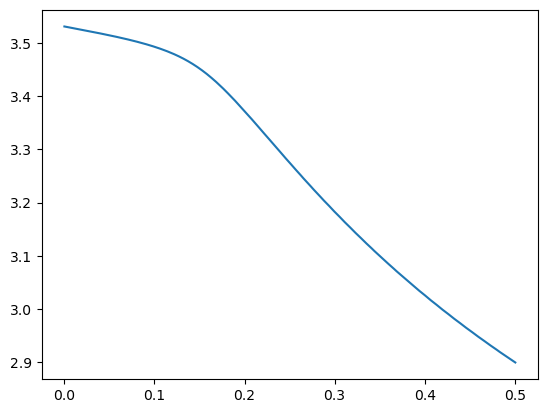

In [8]:
plt.plot(time,l2norm)
plt.show()

# Non flux conserative form

In [9]:
# Define the domain
L = 10.0     # Domain length
nx = 201    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the initial condition
x0=5
u_initial = 10*np.exp(-(x-x0)**2)

# Initialize the solution array
u_current_non = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current_non**2)/len(u_current_non)))

time=[]
time.append(0.0)
# Define the time step and the final time
cf = 0.5
dt = cf*dx/np.max(u_current_non)   # Time step
t_final = 0.5

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

nx= 201
dx= 0.05
dt= 0.0025
Number of iterations= 200.0


In [10]:
##create directory where to save images
print(os.getcwd())

#os.makedirs('./upwind_gaussian_non')

os.listdir('./')

c:\Users\marti\Desktop\University\Numerical relativity


['Another_copy_of_Advection_Equation.ipynb',
 'def_FTCS_gaussian.ipynb',
 'def_LaxFriedrichs_gaussian.ipynb',
 'def_LaxFriedrichs_step.ipynb',
 'def_LaxWendroff_gaussian.ipynb',
 'def_LaxWendroff_gaussian_outflowconditions.ipynb',
 'def_LaxWendroff_step.ipynb',
 'def_Leapfrog_gaussian.ipynb',
 'def_Leapfrog_gaussian_analytic.ipynb',
 'def_Leapfrog_gaussian_outflowconditions.ipynb',
 'def_upwind_gaussian.ipynb',
 'FTCS_gaussian',
 'l2norm_FTCS.dat',
 'l2norm_LAX.dat',
 'l2norm_LAXWENDROFF.dat',
 'l2norm_LEAPFROG.dat',
 'Lax',
 'LaxFriedrichs_gaussian',
 'LaxFriedrichs_step',
 'LaxWendroff_Advection_Equation.ipynb',
 'LaxWendroff_Advection_Equation_conditions.ipynb',
 'LaxWendroff_gaussian',
 'LaxWendroff_gaussian_outflowconditions',
 'LaxWendroff_step',
 'Lax_Advection_Equation.ipynb',
 'Leap',
 'LeapWendroff_Advection_Equation.ipynb',
 'Leap_Advection_Equation.ipynb',
 'Leap_gaussian',
 'Leap_gaussian_analytic',
 'Leap_gaussian_outflowconditions',
 'movie.mp4',
 'movie_FTCS.mp4',
 'mov

In [11]:
# Initilize time and iteration counter
t = 0.0
i = 0
time_tosave_non = []

#save the initial conditions
plt.plot(x, u_current_non)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.savefig('./upwind_gaussian_non/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

u_tosave_non = []

#solve the advection equation
while t < t_final:
    # Compute the new solution using the upwind method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = u_current_non - dt/dx*u_current_non*(u_current_non - np.roll(u_current_non, 1))    
    
    # Update the solution
    u_current_non = u_next.copy()
    
    #advance the time 
    t += dt
    i += 1

    #update dt
    dt = cf*dx/np.max(u_current_non)
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current_non**2)/len(u_current_non)))
    time.append(t)
    
    #plot the current result and save in an image
    if 0.249 < t < 0.251:
        u_tosave_non.append(u_current_non)
        time_tosave_non.append(str(round(t,2)))
        plt.plot(x, u_current_non)
        plt.title('Time='+str(round(t,2)))
        #plt.ylim(0,1.1)
        plt.savefig('./upwind_gaussian_non/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()

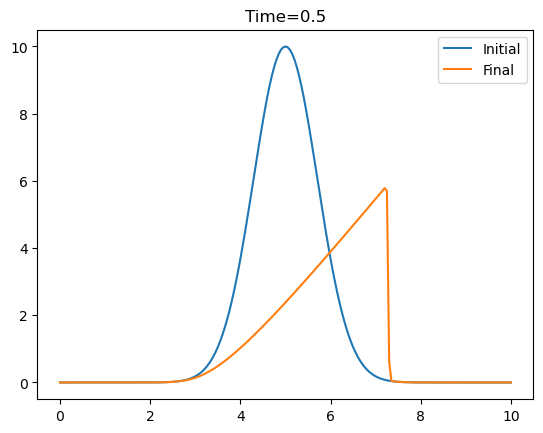

In [12]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current_non, label='Final')
plt.title('Time='+str(round(t,2)))
#plt.ylim(0,1.1)
plt.legend()
plt.show()

In [13]:
# set the directory where your images are stored
directory = "./upwind_gaussian_non/"

# get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n')

# sort the files in alphanumeric order
files=sorted(files)

print(files)

['fig_00000.png', 'fig_00010.png', 'fig_00020.png', 'fig_00030.png', 'fig_00040.png', 'fig_00041.png', 'fig_00050.png', 'fig_00054.png', 'fig_00060.png', 'fig_00070.png', 'fig_00080.png', 'fig_00090.png', 'fig_00093.png', 'fig_00094.png', 'fig_00095.png', 'fig_00096.png', 'fig_00097.png', 'fig_00098.png', 'fig_00100.png', 'fig_00110.png', 'fig_00120.png', 'fig_00130.png', 'fig_00140.png', 'fig_00150.png', 'fig_00160.png', 'fig_00243.png', 'fig_00244.png'] 

['fig_00000.png', 'fig_00010.png', 'fig_00020.png', 'fig_00030.png', 'fig_00040.png', 'fig_00041.png', 'fig_00050.png', 'fig_00054.png', 'fig_00060.png', 'fig_00070.png', 'fig_00080.png', 'fig_00090.png', 'fig_00093.png', 'fig_00094.png', 'fig_00095.png', 'fig_00096.png', 'fig_00097.png', 'fig_00098.png', 'fig_00100.png', 'fig_00110.png', 'fig_00120.png', 'fig_00130.png', 'fig_00140.png', 'fig_00150.png', 'fig_00160.png', 'fig_00243.png', 'fig_00244.png']


In [14]:
%pip install imageio[ffmpeg]
import imageio.v2 as imageio
import glob
images_files = sorted(glob.glob('./upwind_gaussian_non/fig_*.png'))
output_path = os.path.abspath('./movie_upwind_non.mp4')

with imageio.get_writer(output_path, fps=20, codec='libx264') as writer:
    for file in images_files:
        image = imageio.imread(file)
        writer.append_data(image)
    

Note: you may need to restart the kernel to use updated packages.


In [15]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook

from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./movie_upwind_non.mp4" type="video/mp4">
</video></div>""")

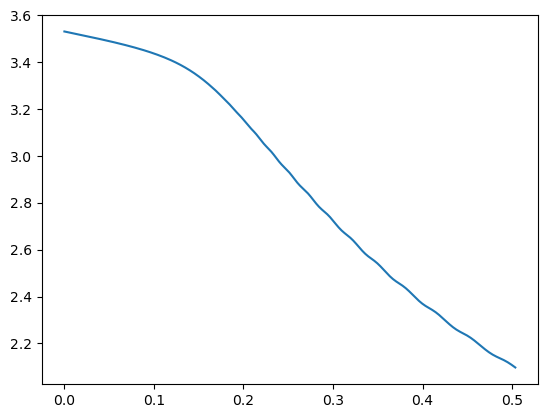

In [16]:
plt.plot(time,l2norm)
plt.show()

Comparison

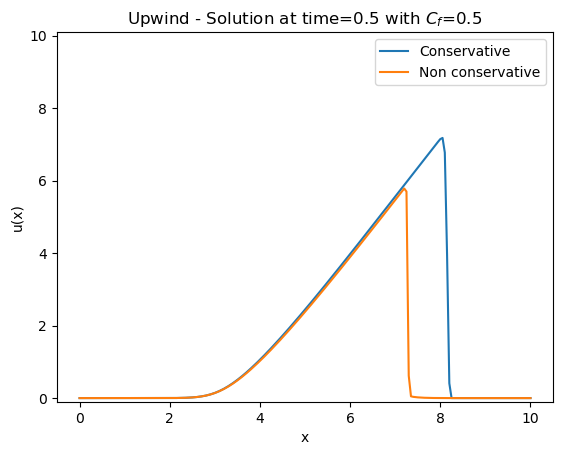

In [17]:
# Plot the two solutions
plt.plot(x, u_current, label='Conservative')
plt.plot(x, u_current_non, label='Non conservative')
plt.title('Upwind - Solution at time='+str(round(t,2))+' with $C_f$='+str(cf))
plt.ylim(-0.1,10.1)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.show()

C:\Users\marti\AppData\Local\Temp\ipykernel_15820\2085271872.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


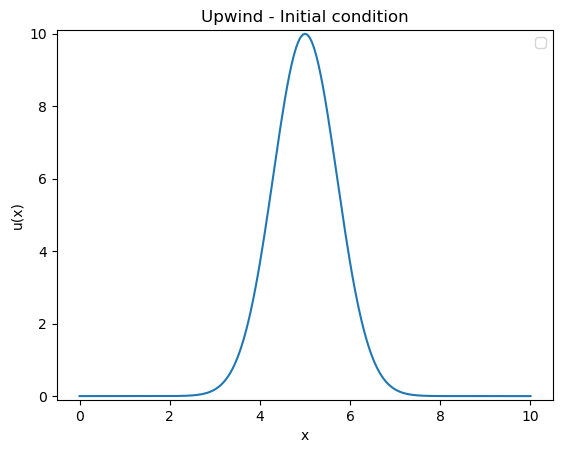

In [18]:
# Plot the initial condition
plt.plot(x, u_initial)
plt.title('Upwind - Initial condition')
plt.ylim(-0.1,10.1)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.show()